# Boston Pricing

根據輸出的結果，共有 506 筆資料，並包含 13 種特徵，這些特徵的意義分別為：

1. **CRIM**：每個城鎮的人均犯罪率 (per capita crime rate by town)
2. **ZN**：佔地 25,000 平方英尺以上的住宅區域比例 (proportion of residential land zoned for lots over 25,000 sq.ft.)
3. **INDUS**：每個城鎮非零售業的營業面積比例 (proportion of non-retail business acres per town)
4. **CHAS**：是否靠近河邊 (Charles River dummy variable)
   (`= 1` 如果該區域臨近河流；`= 0` 否則)
5. **NOX**：一氧化氮濃度（ppm）(nitric oxides concentration in parts per 10 million)
6. **RM**：每個住宅的平均房間數 (average number of rooms per dwelling)
7. **AGE**：1940年前私有住宅的住房比率 (proportion of owner-occupied units built prior to 1940)
8. **DIS**：與五個波士頓工做地區的加權距離 (weighted distances to five Boston employment centres)
9. **RAD**：徑向公路的通達指數 (index of accessibility to radial highways)
10. **TAX**：每 10,000 美元的所需繳的財產稅 (full-value property-tax rate per $10,000)
11. **PTRATIO**：每個城鎮的師生比例 (pupil-teacher ratio by town)
12. **B**：黑人比例（值為 $1000 \times (Bk - 0.63)^2$）
    ($1000(Bk - 0.63)^2$，其中 Bk 是該城鎮的黑人比例)
13. **LSTAT**：中下階級的比率 (% lower status of the population)
14. **MEDV**：自住房屋的中位數價格（單位：千美元）(median value of owner-occupied homes in $1000's)

In [418]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [419]:
df = pd.read_csv('BostonHousing.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## 檢查資料

檢查是否有缺失值。

In [420]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

檢查有沒有不合理的值。

In [421]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


檢查 CHAS 是否都是合理值。

In [422]:
df["chas"].unique()

array([0, 1])

## 房價與每個特徵的關係

初步推理：

- **犯罪率**：當犯罪率越高的話，房價會下降。
- **一氧化氮濃度**：可以初略代表空氣汙染的程度，因此濃度越高的話，房價也會下降。
- **房間數**：理論上房間數越多，房價會越高。
- **師生比例**：當考慮教育機能的時候，會希望此值比較低，表示老師的數量較多，越低房價會上升。
- **黑人的比率**：通常黑人區的房價會比較低。
- **中下階級的比率**：當比率越高，表示不是處於高級住宅區，房價會比較低。

### 犯罪率與房價之關聯

<Axes: xlabel='medv', ylabel='crim'>

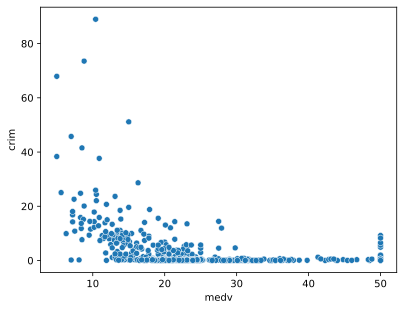

In [423]:
sns.scatterplot(data=df, x="medv", y="crim")

### 房間數與房價之關聯

<Axes: xlabel='medv', ylabel='rm'>

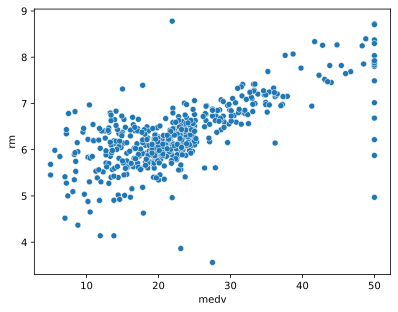

In [424]:
sns.scatterplot(data=df, x="medv", y="rm")

### 黑人比例與房價之關聯

<Axes: xlabel='medv', ylabel='b'>

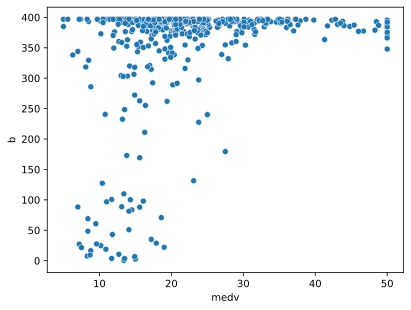

In [425]:
sns.scatterplot(data=df, x="medv", y="b")

### 各特徵間的相關性

In [426]:
df.corr(method="pearson")

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

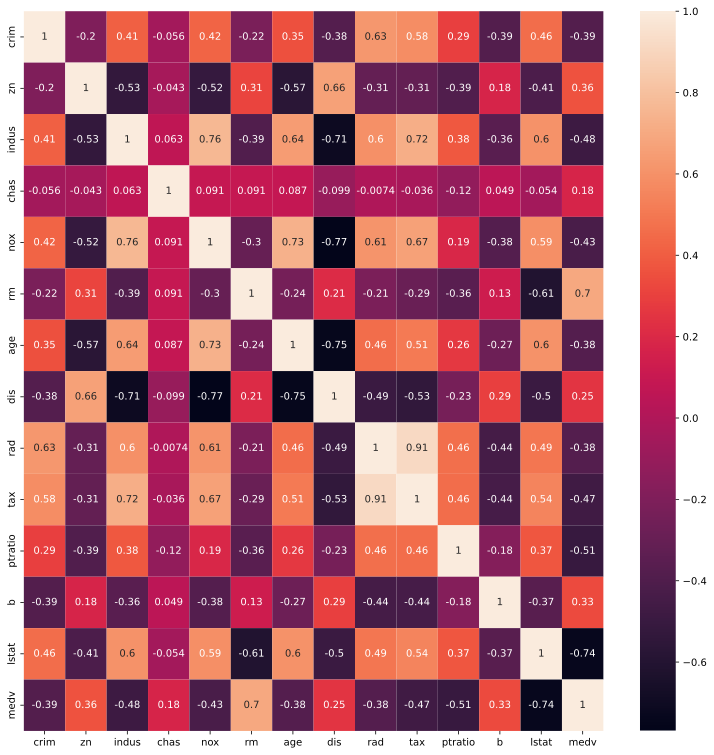

In [427]:
plt.figure(figsize= (13, 13))
sns.heatmap(df.corr(method="pearson"), annot=True)

## 建立線性迴歸模型（不選擇重要特徵）

In [428]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [429]:
X = df.drop(columns=["medv"])
y = df["medv"]

In [430]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 將資料分成 7:3 的訓練與測試資料集

進行標準化。

In [431]:
sc = StandardScaler()
X_train_stds = sc.fit_transform(X_train)

訓練回歸模型。

In [432]:
model = LinearRegression()
model.fit(X_train_stds, y_train)

LinearRegression()

預測 `X_test`。

In [433]:
X_test_stds = sc.transform(X_test)
y_test_preds = model.predict(X_test_stds)

繪製預測值與實際值的散佈圖。

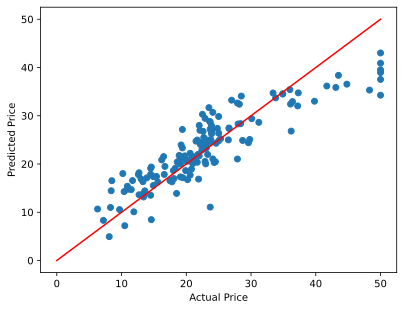

In [434]:
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.plot([0, 50], [0, 50], color="red")  # 基準線
plt.scatter(y_test, y_test_preds)  # 真實值與預測值的散佈圖

plt.show()

查看 $R^2$ 成績。

In [435]:
model.score(X_train_stds, y_train)

0.7103879080674731

In [436]:
model.score(X_test_stds, y_test)

0.7836295385076291

## 建立線性回歸模型（選擇重要特徵）

上面的分析是使用直接 13 個特徵，這裡只選取比較重要的特徵出來討論。

首先選擇重要特徵。

In [437]:
df_important = df.drop(["crim", "indus", "chas", "age", "b"], axis=1)  # 移除相關性較低的特徵

df_important

,zn,nox,rm,dis,rad,tax,ptratio,lstat,medv
0,18.0,0.538,6.575,4.0900,1,296,15.3,4.98,24.0
1,0.0,0.469,6.421,4.9671,2,242,17.8,9.14,21.6
2,0.0,0.469,7.185,4.9671,2,242,17.8,4.03,34.7
3,0.0,0.458,6.998,6.0622,3,222,18.7,2.94,33.4
4,0.0,0.458,7.147,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...
501,0.0,0.573,6.593,2.4786,1,273,21.0,9.67,22.4
502,0.0,0.573,6.120,2.2875,1,273,21.0,9.08,20.6
503,0.0,0.573,6.976,2.1675,1,273,21.0,5.64,23.9
504,0.0,0.573,6.794,2.3889,1,273,21.0,6.48,22.0


In [438]:
X = df_important.drop(columns=["medv"])
y = df_important["medv"]

將資料分成 7:3 的訓練與測試資料集。

In [439]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

標準化。

In [440]:
scaler = StandardScaler()
X_train_stds = scaler.fit_transform(X_train)

訓練模型。

In [441]:
model = LinearRegression()
model.fit(X_train_stds, y_train)

LinearRegression()

預測測試集。

In [442]:
X_test_stds = scaler.transform(X_test)
y_pred = model.predict(X_test_stds)

查看預測結果。

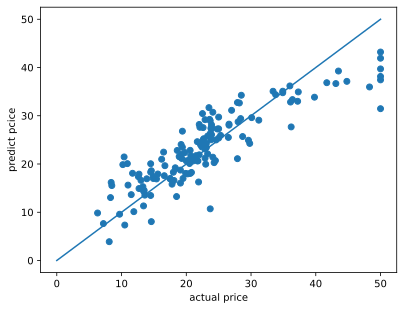

In [443]:
plt.xlabel("actual price")
plt.ylabel("predict pcice")
plt.plot([0,50], [0,50]) # 劃一條基準線
plt.scatter(y_test, y_pred)
plt.show() # 查看結果

$R^2$:

In [444]:
model.score(X_test_stds, y_test)

0.7609335561698128

In [445]:
model.score(X_train_stds, y_train)

0.693905084574545

## 建立線性回歸模型（PCA 降維）

因為數據只有 506 筆，基本上當數據量越少，所需的維度就要少，因此我們使用 PCA 降維的方式，它是屬於線性的降維。

In [446]:
from sklearn.decomposition import PCA # 引入 PCA

In [447]:
X = df.drop(columns=["medv"])
y = df["medv"]

In [448]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [449]:
scaler = StandardScaler()
X_train_stds = scaler.fit_transform(X_train)

X_train_stds

array([[-0.36571739, -0.48366069, -0.46209575, ...,  1.18880212,
         0.43987709, -0.64691635],
       [-0.4195265 ,  0.58018848, -0.90151022, ...,  0.58247746,
         0.231398  ,  0.20337764],
       [ 0.71430973, -0.48366069,  0.99191363, ...,  0.81567925,
         0.43987709,  1.13897622],
       ...,
       [ 0.25011703, -0.48366069,  0.99191363, ...,  0.81567925,
         0.43987709,  0.88168661],
       [-0.40087863, -0.48366069, -0.74530641, ..., -0.49025077,
         0.21666488, -0.28643573],
       [-0.43028363, -0.48366069, -0.78034278, ...,  0.34927567,
         0.43987709, -0.57674646]])

執行 PCA 降維。

In [450]:
pca = PCA(n_components=7)  # n_components 也可以留空
X_train_pca = pca.fit_transform(X_train_stds)

X_train_pca

array([[-0.74020474, -0.25772248, -1.24562422, ..., -0.14514554,
        -0.56596712,  0.04461017],
       [-1.12677007,  0.41200925, -1.12287251, ...,  0.48122035,
        -0.1447791 ,  0.15283262],
       [ 2.9936818 ,  0.22433221,  0.63444212, ..., -0.86961056,
         0.92863439,  0.25878327],
       ...,
       [ 2.88805017,  0.07690996,  0.32493914, ..., -0.73441053,
         0.98689907, -0.26585872],
       [-0.87661873, -0.41895382, -0.46985388, ..., -0.27282201,
        -0.24351367,  0.30630959],
       [-1.23668004, -0.25727081, -1.11485924, ..., -0.05430107,
        -0.45171768,  0.16379791]])

然後進行線性回歸。

In [451]:
model = LinearRegression()
model.fit(X_train_pca, y_train)

LinearRegression()

In [452]:
X_test_stds = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_stds)
y_pred = model.predict(X_test_pca)

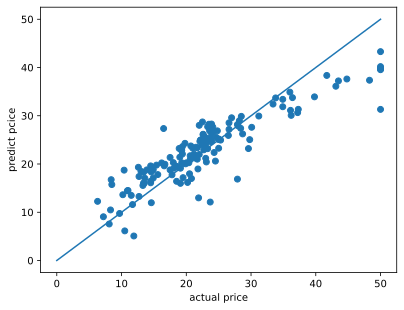

In [453]:
plt.xlabel(xlabel="actual price")
plt.ylabel("predict pcice")
plt.plot([0, 50], [0, 50])
plt.scatter(y_test, y_pred)
plt.show()

查看 $R^2$ 分數。

In [454]:
model.score(X_test_pca, y_test)

0.7850198723960751

In [455]:
model.score(X_train_pca, y_train)

0.6536733606200699

In [456]:
from sklearn.decomposition import PCA # 多引入PCA

In [457]:
X = df.drop(columns=["medv"])
y = df["medv"]

In [458]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [459]:
scaler = StandardScaler()
X_train_stds = scaler.fit_transform(X_train)

X_train_stds

array([[-0.36571739, -0.48366069, -0.46209575, ...,  1.18880212,
         0.43987709, -0.64691635],
       [-0.4195265 ,  0.58018848, -0.90151022, ...,  0.58247746,
         0.231398  ,  0.20337764],
       [ 0.71430973, -0.48366069,  0.99191363, ...,  0.81567925,
         0.43987709,  1.13897622],
       ...,
       [ 0.25011703, -0.48366069,  0.99191363, ...,  0.81567925,
         0.43987709,  0.88168661],
       [-0.40087863, -0.48366069, -0.74530641, ..., -0.49025077,
         0.21666488, -0.28643573],
       [-0.43028363, -0.48366069, -0.78034278, ...,  0.34927567,
         0.43987709, -0.57674646]])

執行 PCA 降維。

In [460]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_stds)

X_train_pca

array([[-0.74020474, -0.25772248, -1.24562422, ...,  0.41805738,
         0.38013874,  0.09292103],
       [-1.12677007,  0.41200925, -1.12287251, ..., -0.48023784,
         0.53980963, -0.31908567],
       [ 2.9936818 ,  0.22433221,  0.63444212, ...,  0.14827287,
        -0.23736527, -0.06685391],
       ...,
       [ 2.88805017,  0.07690996,  0.32493914, ...,  0.15207453,
        -0.12608504, -0.1019817 ],
       [-0.87661873, -0.41895382, -0.46985388, ..., -0.09198652,
        -0.17814532, -0.14442752],
       [-1.23668004, -0.25727081, -1.11485924, ...,  0.38013218,
        -0.20149614, -0.04221687]])

然後進行線性回歸。

In [461]:
model = LinearRegression()
model.fit(X_train_pca, y_train)

LinearRegression()

In [462]:
X_test_stds = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_stds)
y_pred = model.predict(X_test_pca)

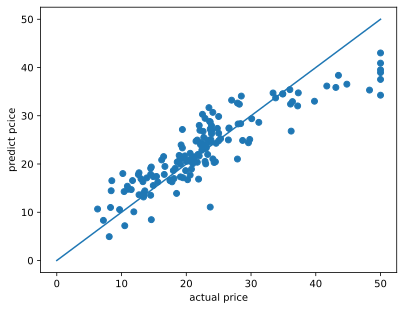

In [463]:
plt.xlabel(xlabel="actual price")
plt.ylabel("predict pcice")
plt.plot([0, 50], [0, 50])
plt.scatter(y_test, y_pred)
plt.show()

查看 $R^2$ 分數。

In [464]:
model.score(X_test_pca, y_test)

0.7836295385076292

In [465]:
model.score(X_train_pca, y_train)

0.7103879080674731

總結：以上模型分數都越來越提升。